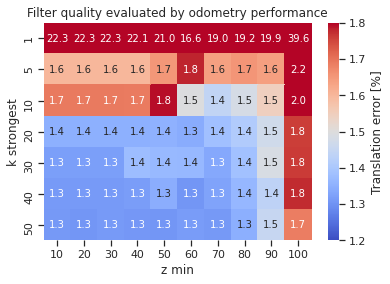

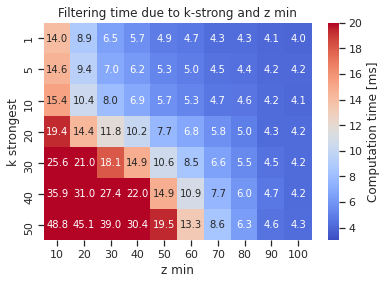

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv




sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")
#colors = ["#FF8614", "#D06B0D", "#8E4A0A", "#2B9BFF", "#2277C2", "#19578E"]
#pal=sns.color_palette(colors)
pal=sns.color_palette("coolwarm", as_cmap=True)
sns.set_palette("coolwarm")

### LOAD AND SORT NAMES OF COLUMNS
df = pd.read_csv('./kstrong_filtering_2021-07-17_09:14_eval.csv', sep=r',', header=0)
df=df[df["cost type"].str.contains("P2P")]

df.sort_values(by=["z min", "k strongest"])
result = df.pivot_table(index='k strongest', 
                        columns='z min', 
                        values='Trans.err. [%]')
#print(result)
plt.figure(1)
#map=sns.color_palette("RdY1Gn_r",5)
sns_plot = sns.heatmap(result,vmin=1.2, vmax=1.8, cmap="coolwarm",annot=True, fmt="0.1f",cbar_kws={'label': 'Translation error [%]'},annot_kws={"size": 10})
plt.title('Filter quality evaluated by odometry performance')
fig=sns_plot.get_figure()
fig.savefig('./output/k-strongest_parameter_sensitivity.eps', format='eps')
fig.savefig('./output/k-strongest_parameter_sensitivity.png', format='png', dpi=1000)



plt.figure(2)
dd=df.sort_values(by=["z min", "k strongest"])
filter_tab = dd.pivot_table(index='k strongest', columns='z min', values='Filtering avg')
sns_plot_2 = sns.heatmap(filter_tab,vmin=3, vmax=20, cmap="coolwarm",annot=True, fmt=".1f",cbar_kws={'label': 'Computation time [ms]'},annot_kws={"size": 10})
plt.title('Filtering time due to k-strong and z min')
fig2=sns_plot_2.get_figure()
fig2.savefig('./output/k-strongest_time.eps', format='eps')
fig2.savefig('./output/k-strongest_time.png', format='png', dpi=1000)
